###  CORTX Metrics Compare Open Source Projects 

This jupyter notebook does some analysis and graphing comparing various open source object storage systems

In [1]:
%%capture
%cd /home/johnbent/cortx/metrics
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cortx_community as cc
import cortx_graphing as cg
import datetime
from github import Github

In [2]:
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.markersize'] = 10

sf_data=cc.ProjectComparisons().get_stats()
star_data=sf_data['stars']
fork_data=sf_data['forks']
watch_data=sf_data['watchers']

slack_user = cc.ReadPickle("./pickles/slack_users_stats.pickle")
slack_users_data = slack_user.read_pickle()

#star_data.keys() | fork_data.keys()


In [3]:
def get_dataframe(data):
    def add_items_to_df(df,name,items):
        if name == 'CORTX':
            print("adding %d items to CORTX" % (len(items)), items)
        df1=pd.DataFrame(data={name : items})
        return pd.concat([df, df1], axis=1) 
    
    largest=0
    name_of_largest = None
    for k,v in data.items():
        if len(v[1]) > largest:
            largest = len(v[1])
            name_of_largest = k
    df=pd.DataFrame(index=data[name_of_largest][0],data={ name_of_largest : data[name_of_largest][1] })
    for k,v in data.items():
        if k is not name_of_largest:
            df=add_items_to_df(df,k,v[1])
    return df

def dict_to_dataframe(data):
    enrich_data = {}
    for date in data.keys():
        enrich_data[date] = {}
        for key, workspace in data[date].items():
            enrich_data[date].update({key: workspace['counts']['everyone']})
    df = pd.DataFrame.from_dict(enrich_data, orient='index')
    df.fillna(method='ffill')
    df = df.dropna(how='all', axis=0)
    return df


def plot_graph(data):
    styles = ['bs-', 'rs-', 'ys-', 'gs-', 'cs-', 'ms-', 'ks-',
              'bo-', 'ro-', 'yo-', 'go-', 'co-', 'mo-', 'ko-',
              'b^-', 'r^-', 'y^-', 'g^-', 'c^-', 'm^-', 'k^-',
              ]
    ylim = (0, None)
    ax = data.plot(title="Slack User Count", ylim=ylim, style=styles)
    (min_x, max_x) = ax.get_xlim()
    max_x *= 1.1  # extend x-axis temporarily since some projects only currently have one datapoint
    plt.xlim(min_x, max_x)
    plt.legend(loc='upper left')
    plt.show()

    
def get_dataframe2(data):
    def add_items_to_df(df,name,items):
        df1=pd.DataFrame(data={name : items})
        return pd.concat([df, df1], axis=1) 
    
    # collect all indices from all data sets
    tmp_indices=set()
    for k,v in data.items():
        tmp_indices |= set(v[0])
    indices=list(sorted(tmp_indices))
    
    # collect all data from all data set using the union of the indices
    all_data={}
    for k,v in data.items():
        data=[]
        for i in indices:
            found = False
            for j in range(len(v[1])):
                if v[0][j] == i:
                    data.append(v[1][j])
                    found = True
            if not found:
                data.append(None)
        all_data[k]=data
    df=pd.DataFrame(index=indices,data=all_data)
    return df.fillna(method='ffill')

def make_graph(df,data,end_day,title,what):
    def get_max_y(data):
        max_y=0
        for k,v in data.items():
            try:
                this_max = v[1][end_day]
            except IndexError:
                this_max = v[1][-1]
            max_y = max(max_y,this_max)
        return max_y * 1.1 # increase it by 10% to add some margin at top of graph

    if end_day:
        max_y=get_max_y(data)
    else:
        max_y=None
    ax=df.plot(xlim=(0,end_day),ylim=(0,max_y),title="%s %s Data" % (title,what))
    ax.set_ylabel('%s Count' % what)
    ax.set_xlabel('Day')
    plt.show()

The next four graphs compare CORTX to a variety of other open source object storage systems.  All graphs normalize the data for each project to each's respective "day zero". Stars are more of a reflection of popularity and marketing whereas forks are a reflection of a much deeper interest in the software.

adding 348 items to CORTX [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 13, 16, 20, 20, 24, 25, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 38, 39, 87, 121, 124, 133, 143, 147, 151, 151, 154, 154, 155, 156, 158, 163, 165, 166, 167, 168, 173, 175, 176, 176, 176, 176, 176, 179, 181, 184, 185, 185, 186, 188, 190, 200, 203, 205, 205, 205, 208, 208, 211, 211, 212, 213, 213, 214, 214, 214, 215, 216, 216, 218, 218, 218, 220, 221, 221, 221, 221, 222, 222, 222, 223, 224, 224, 224, 225, 226, 227, 229, 230, 232, 233, 235, 237, 237, 237, 237, 237, 238, 2

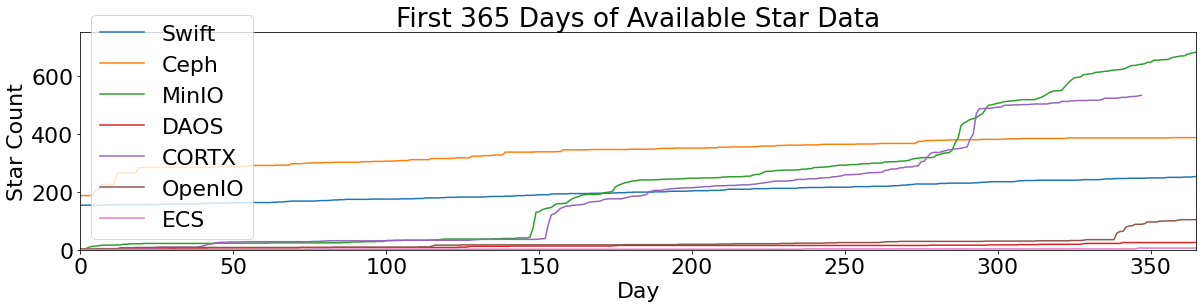

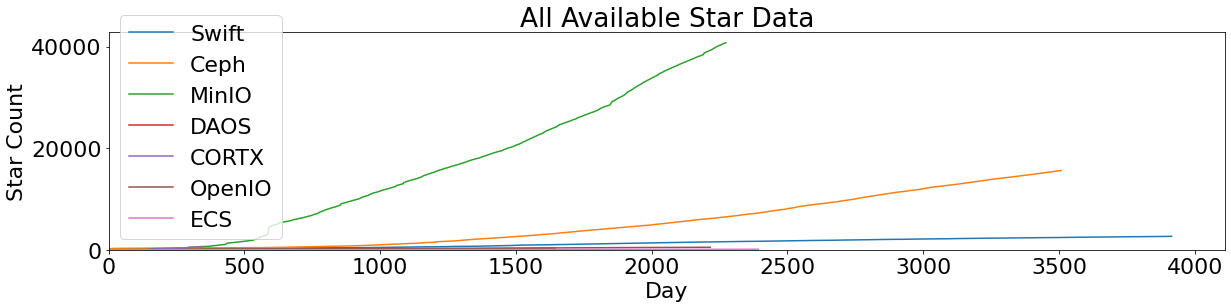

adding 198 items to CORTX [26, 44, 47, 64, 72, 79, 84, 85, 89, 89, 107, 115, 117, 123, 129, 130, 130, 132, 133, 135, 137, 138, 138, 138, 139, 144, 150, 163, 166, 168, 168, 169, 172, 173, 178, 179, 179, 179, 180, 190, 192, 193, 193, 194, 194, 201, 203, 205, 207, 207, 208, 208, 208, 209, 210, 212, 213, 214, 214, 214, 214, 214, 215, 218, 219, 219, 220, 221, 224, 224, 225, 226, 226, 226, 230, 230, 232, 236, 236, 236, 236, 237, 239, 241, 243, 244, 244, 245, 245, 246, 248, 250, 250, 250, 252, 253, 255, 255, 262, 262, 262, 263, 264, 265, 269, 271, 272, 272, 275, 275, 278, 284, 287, 287, 287, 289, 291, 294, 302, 303, 307, 307, 316, 316, 329, 352, 357, 359, 359, 368, 381, 390, 397, 402, 403, 404, 408, 408, 432, 450, 458, 458, 458, 459, 460, 462, 463, 467, 467, 467, 467, 472, 472, 475, 475, 476, 476, 476, 480, 486, 488, 498, 500, 500, 501, 509, 514, 518, 523, 526, 526, 538, 540, 544, 545, 548, 549, 550, 553, 553, 555, 558, 562, 562, 563, 563, 564, 567, 571, 573, 574, 574, 574, 578, 580, 581, 583

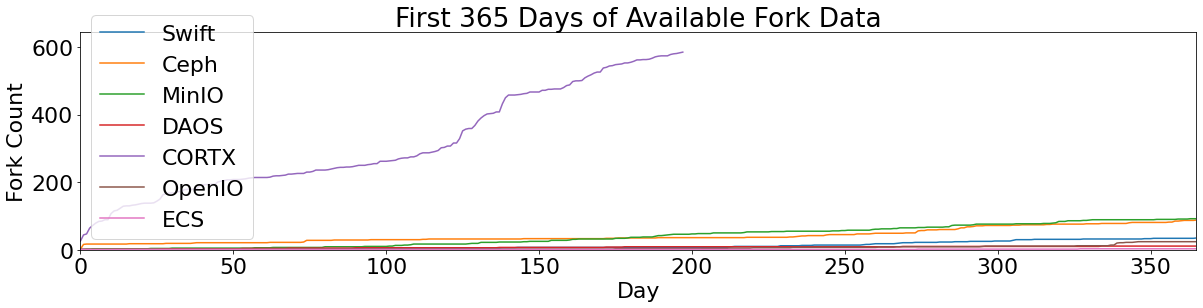

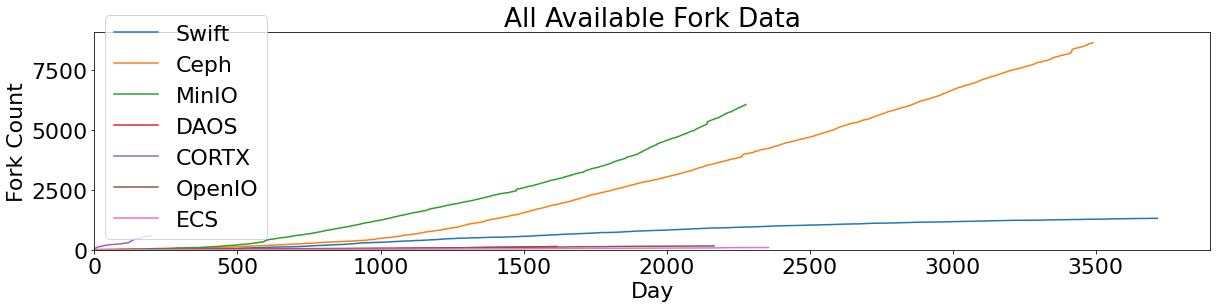

In [4]:
# watcher graphs
# somehow the watcher for CORTX has initial data from before we went open source
# today is April 9, 2021.  "Day Zero" for CORTX was 197 days ago.  So manually adjust the data
if False:
    watch_data['CORTX'] = (watch_data['CORTX'][0][0:197],watch_data['CORTX'][1][-198:])
    print(watch_data['CORTX'])
    print(len(watch_data['CORTX'][1]))
    print(len(watch_data['CORTX'][0]))
    #print(watch_data['CORTX'])
    df=get_dataframe(watch_data)
    print(df.head(197))
    make_graph(df=df,data=watch_data,end_day=365,title="First 365 Days of Available",what='Watchers')
    make_graph(df=df,data=watch_data,end_day=None,title="All Available",what='Watchers')

# star graphs
df=get_dataframe(star_data)
make_graph(df=df,data=star_data,end_day=365,title="First 365 Days of Available",what='Star')
make_graph(df=df,data=star_data,end_day=None,title="All Available",what='Star')

# fork graphs
df=get_dataframe(fork_data)
make_graph(df=df,data=fork_data,end_day=365,title="First 365 Days of Available",what='Fork')
make_graph(df=df,data=fork_data,end_day=None,title="All Available",what='Fork')

The graphs below compare each project using absolute dates on the horizontal axis and every scraped metric on the vertical.

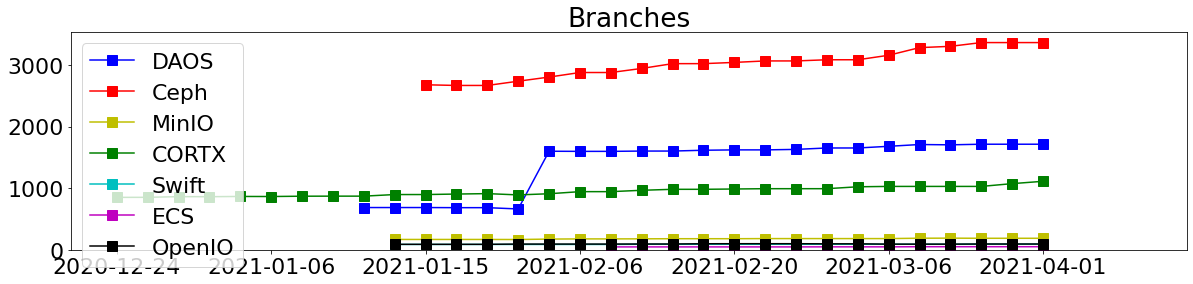

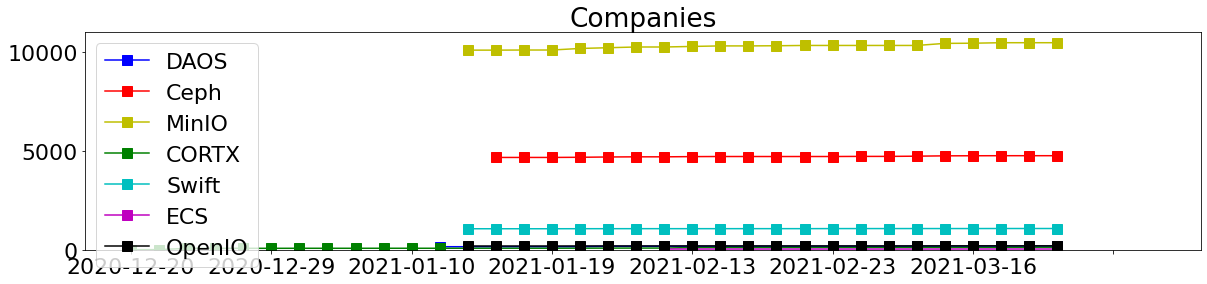

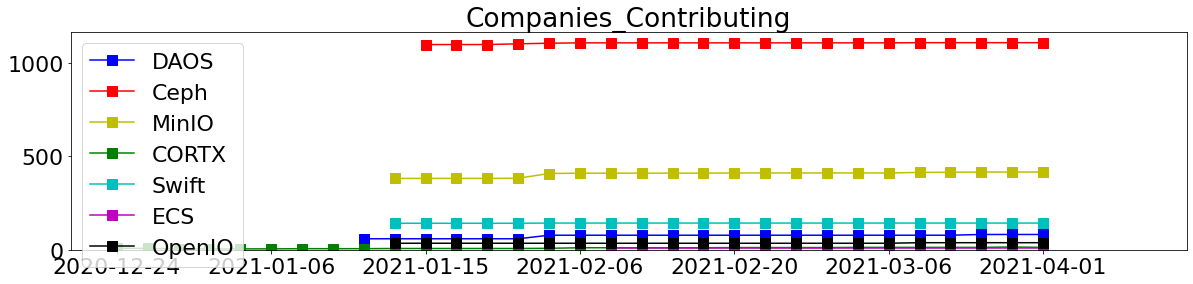

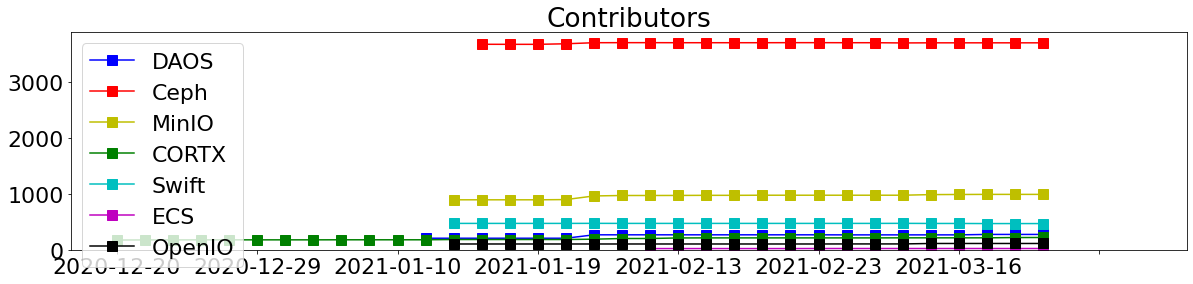

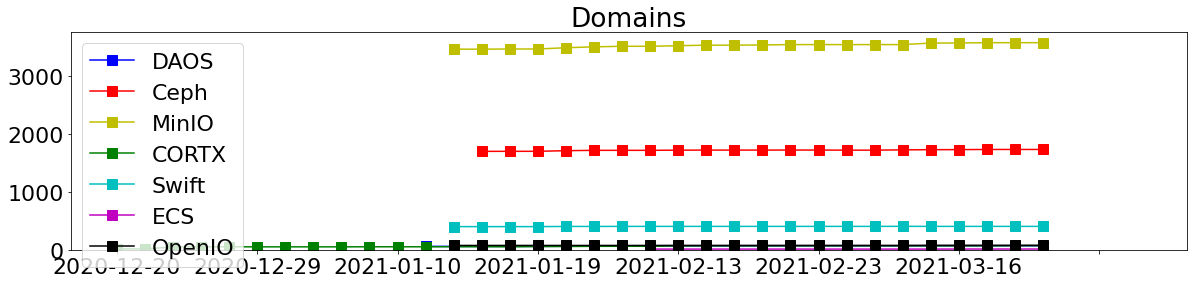

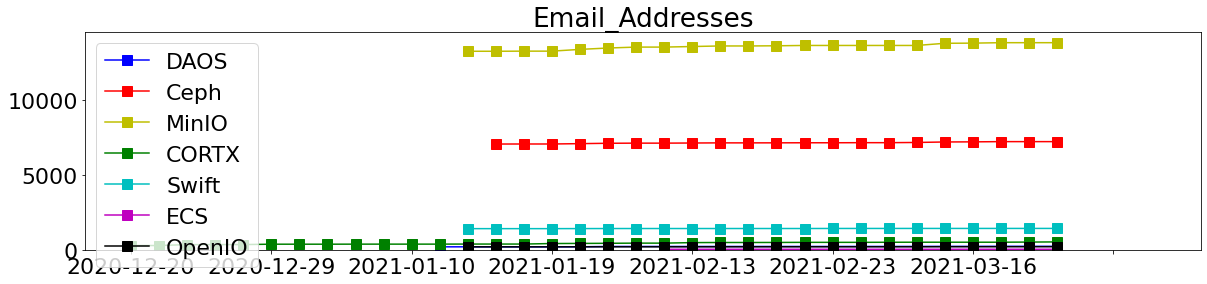

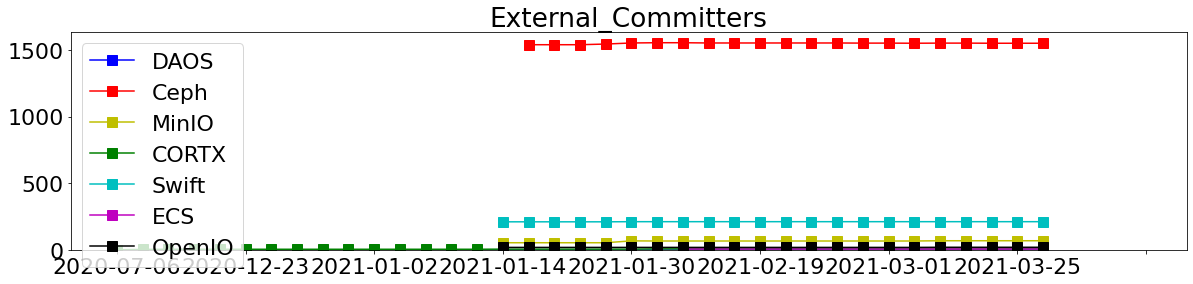

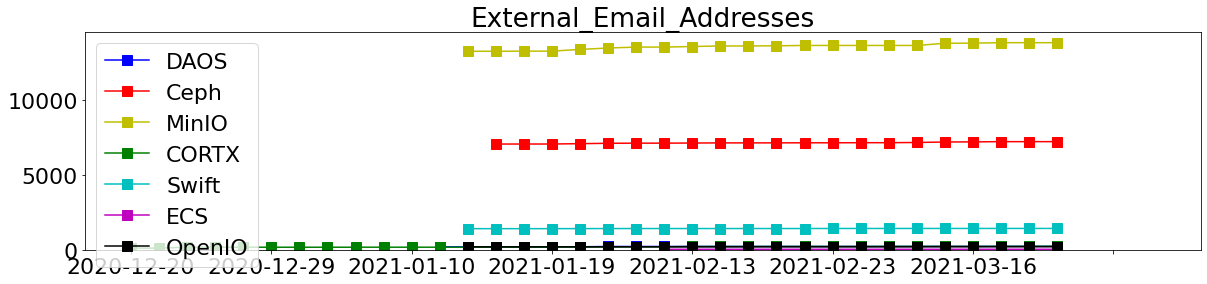

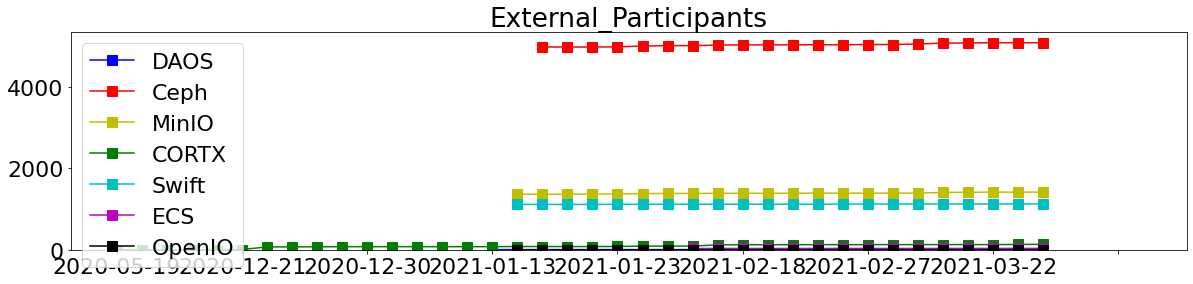

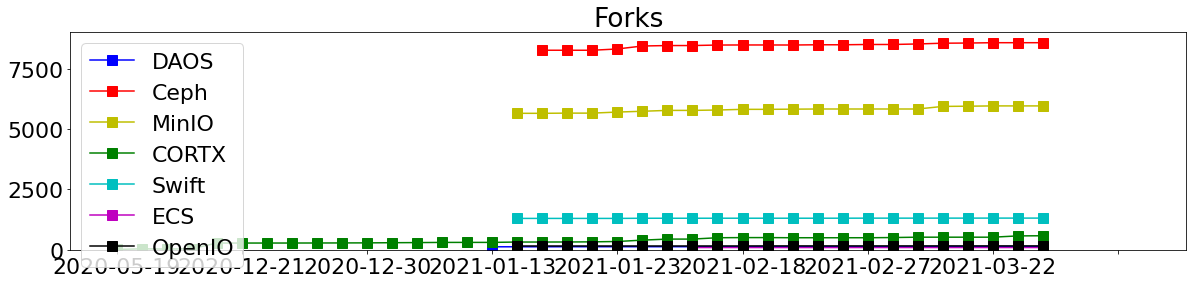

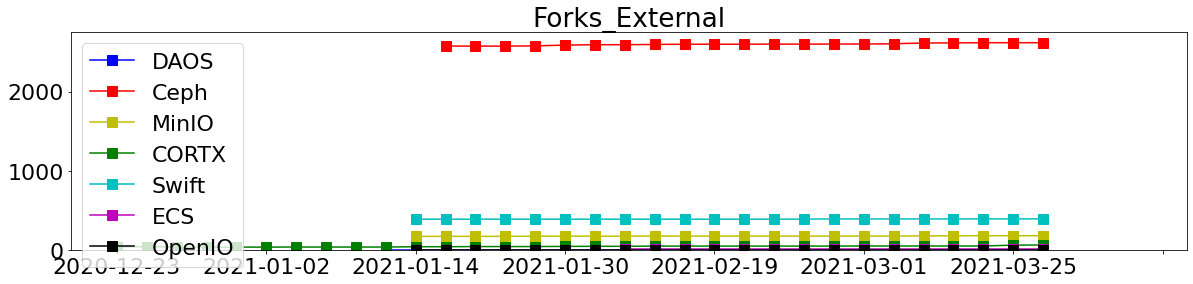

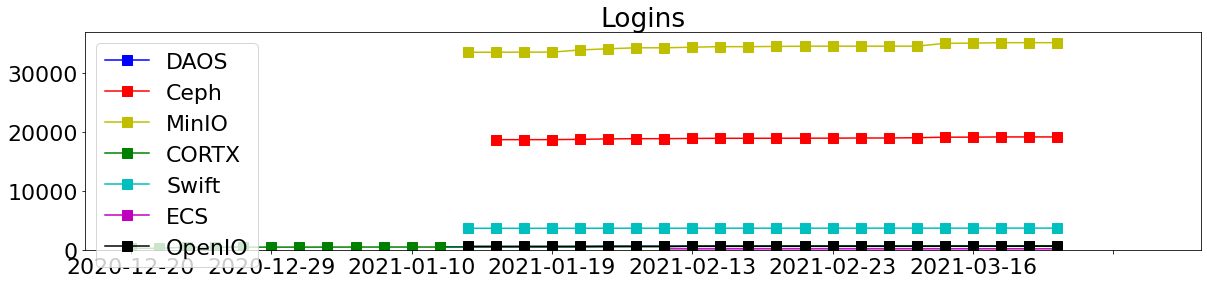

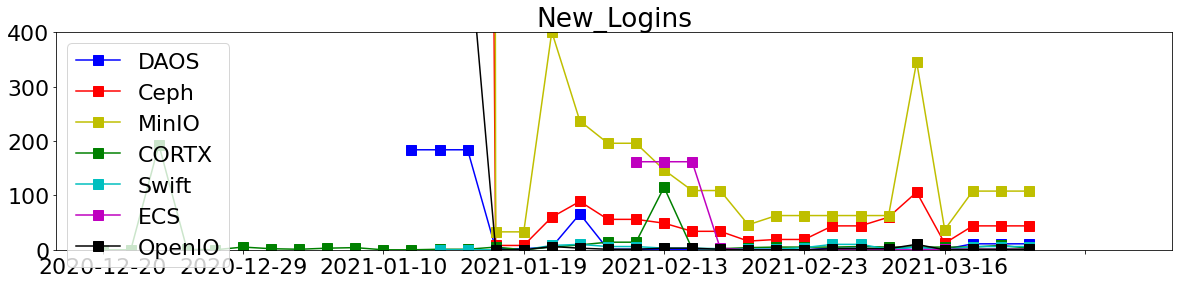

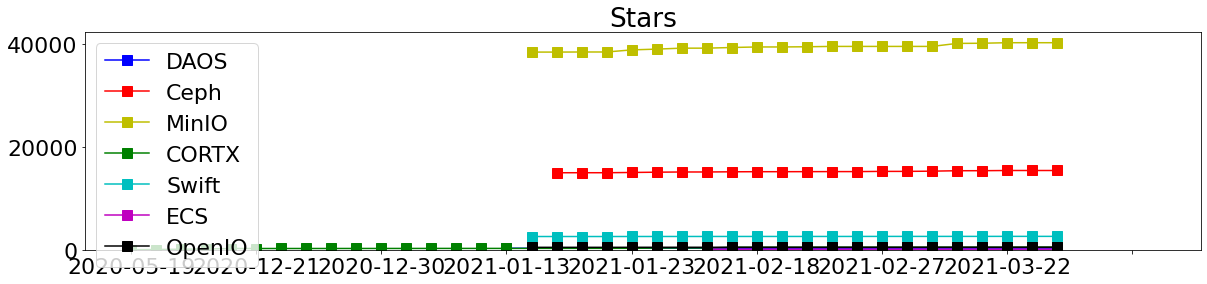

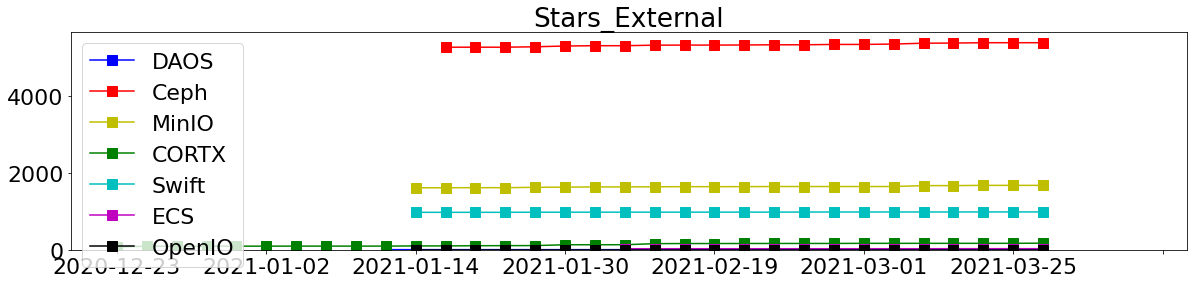

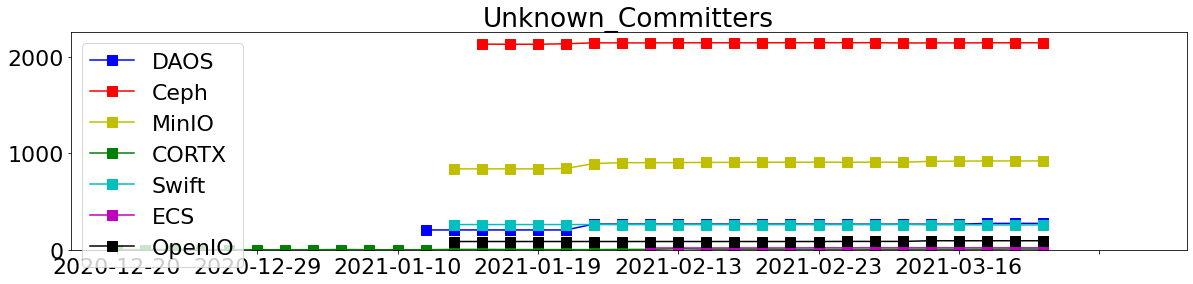

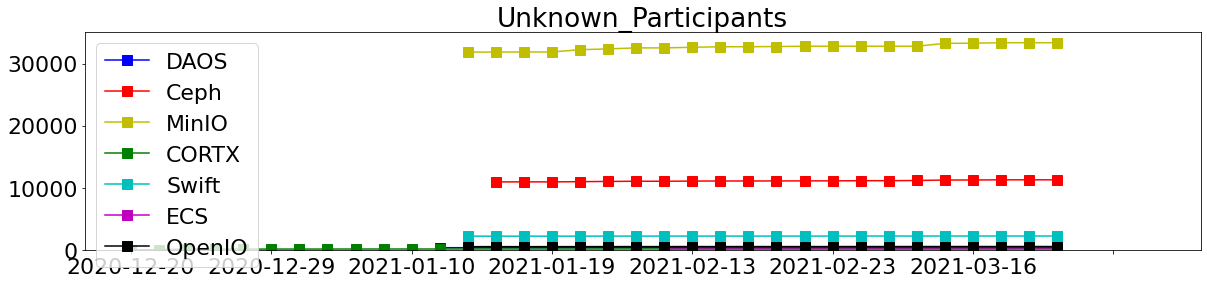

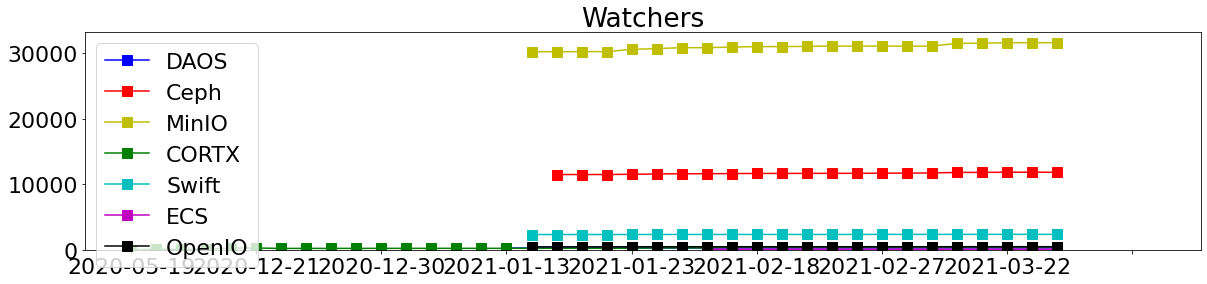

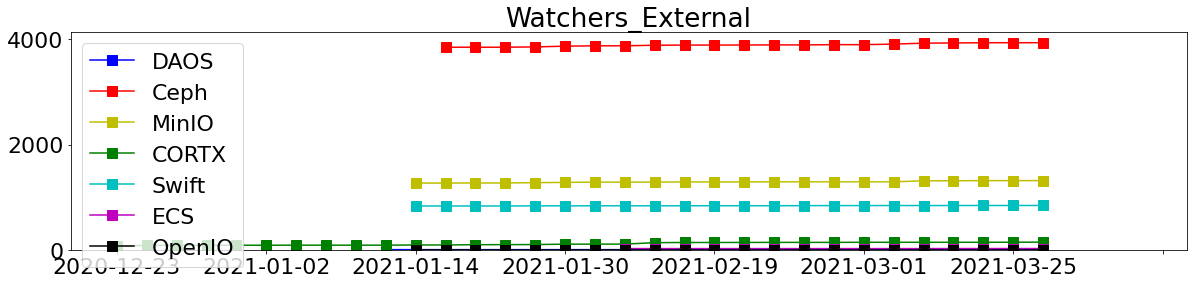

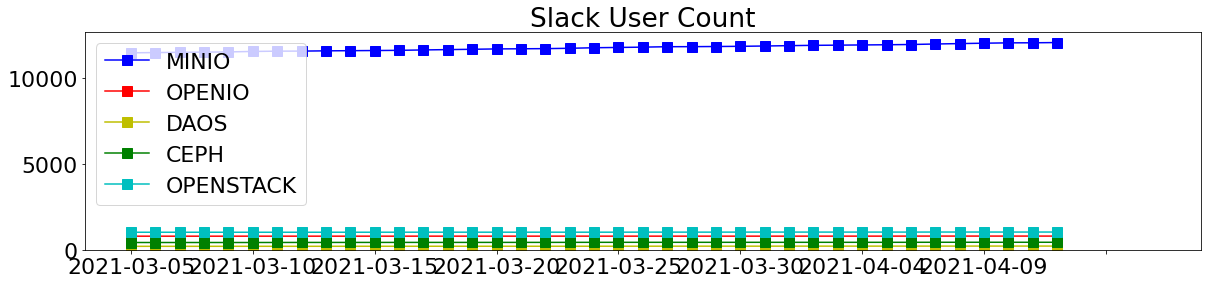

In [5]:
rname='GLOBAL'
def get_dataframe3(stats,key):
    data={}
    for org,values in stats.items():
        dates=[pd.to_datetime(k) for k in values.get_dates(rname)] # this might be better but isn't working...
        dates=values.get_dates(rname)
        values=values.get_values_as_numbers(rname,key)
        data[org]=(dates,values)
    df = get_dataframe2(data)
    df = df.dropna(how='all',axis=0) 
    return df

def org_to_project(org):
    for k,v in cc.projects.items():
        if v[0].lower() == org.lower():
            return k
    return org

# only need this temporarily since some of the projects only have one data point which won't show up with just lines
styles=['bs-', 'rs-', 'ys-','gs-','cs-','ms-','ks-',
        'bo-', 'ro-', 'yo-','go-','co-','mo-','ko-',
        'b^-', 'r^-', 'y^-','g^-','c^-','m^-','k^-',
]

stats={}
for org in cc.org_company_map.keys():
    project_name=org_to_project(org)
    stats[project_name]=cc.PersistentStats(org_name=org)
    if rname not in stats[project_name].get_repos():
        stats.pop(project_name) # haven't scraped for this org yet        
        
def make_graph2(stats,key):
    df=get_dataframe3(stats,key)
    if key == 'new_logins':
        ylim=(0,400)
    else:
        ylim=(0,None)
    ax=df.plot(title=key.title(),ylim=ylim,style=styles)
    (min_x,max_x)=ax.get_xlim()
    max_x *= 1.1 # extend x-axis temporarily since some projects only currently have one datapoint
    plt.xlim(min_x,max_x)
    plt.legend(loc='upper left')
    plt.show()

def get_relevant_keys():
    all_keys=[]
    (dstats,dlatest)=stats['DAOS'].get_latest(rname)
    for k in dstats.keys():
        v = stats['DAOS'].get_values_as_numbers(rname,k)
        if v[-1] > 0:
            all_keys.append(k)
    return sorted(all_keys)

for k in get_relevant_keys():
    make_graph2(stats,k)
    
slack_df = dict_to_dataframe(slack_users_data)
plot_graph(slack_df)